# Task 3: DATA MODELLING
---

# 1.0 Importing Essential Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# 2.0 Load the Dataset

In [ ]:
# import gdown

# url = "https://drive.google.com/file/d/1w1OQUxBmvrnlK3tNFVpXHHTv5Sy1JJCj/view?usp=sharing"
# file_id = url.split("/")[-2]
# prefix = "https://drive.google.com/uc?export=download&id="

# gdown.download(prefix + file_id)
# print("Data downloaded!")

In [ ]:
# !unzip arfrica_crop_yield_fusion.zip
# !rm -rf arfrica_crop_yield_fusion.zip

In [ ]:
# read dataset
data_path = '/content/merged_data_yield.csv'
data = pd.read_csv(data_path)

# list all the crop yield categories
crop_columns = [
    'rice_yield_tonnes_per_hectare', 'bananas_yield_tonnes_per_hectare',
    'maize_yield_tonnes_per_hectare', 'soybean_yield_tonnes_per_hectare',
    'potatoes_yield_tonnes_per_hectare', 'beans_yield_tonnes_per_hectare',
    'peas_yield_tonnes_per_hectare', 'cassava_yield_tonnes_per_hectare',
    'cocoa_beans_yield_tonnes_per_hectare', 'barley_yield_tonnes_per_hectare',
    'wheat_yield_tonnes_per_hectare'
]

# count total
data['total_yield_tonnes_per_hectare'] = data[crop_columns].sum(axis=1)

data.head()

,country,year,cropland_area,ndvi_mean,temperature_mean,average_annual_precipitation_mm,clay_mean_value,sand_mean_value,nitrogen_mean_value,phh2o_mean_value,...,bananas_yield_tonnes_per_hectare,maize_yield_tonnes_per_hectare,soybean_yield_tonnes_per_hectare,potatoes_yield_tonnes_per_hectare,beans_yield_tonnes_per_hectare,peas_yield_tonnes_per_hectare,cassava_yield_tonnes_per_hectare,cocoa_beans_yield_tonnes_per_hectare,barley_yield_tonnes_per_hectare,total_yield_tonnes_per_hectare
0,Dem. Rep. Congo,2017,6802.801352,0.585498,297.787228,1595.731927,335.819403,430.235202,2774.424658,5.408747,...,3.7635,0.7719,0.4922,4.5702,0.5430,0.4046,8.1420,0.4861,0.6805,21.9544
1,Dem. Rep. Congo,2018,8236.848528,0.588366,297.595389,1622.158468,317.736961,462.290274,2668.407075,5.401797,...,3.7585,0.7702,0.5428,4.5620,0.5429,0.4048,8.1447,0.4516,0.6826,21.9868
2,Dem. Rep. Congo,2019,6202.692128,0.589856,297.840254,1787.483950,334.971571,431.951936,2814.075162,5.416112,...,3.7568,0.7704,0.5218,4.5737,0.5437,0.4058,8.1497,0.4797,0.6806,22.0466
3,Dem. Rep. Congo,2020,5960.192934,0.603436,297.932522,1825.378869,332.487986,435.046831,2825.262649,5.438038,...,3.7552,0.7706,0.5136,4.5909,0.5447,0.4047,8.1453,0.5077,0.6812,22.1573
4,Dem. Rep. Congo,2021,6982.951826,0.594865,297.975652,1462.586482,320.117299,456.527239,2645.724268,5.435061,...,3.7563,0.7697,0.5375,4.5889,0.5449,0.4050,8.1481,0.5207,0.6815,22.1906


# 3.0 Data Scaling and Functionality Setup

In [ ]:
# onehot encoding
X = pd.get_dummies(data.drop(columns=crop_columns + ['total_yield_tonnes_per_hectare']), columns=['country', 'year'])


In [ ]:
# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = data['total_yield_tonnes_per_hectare']

In [ ]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# evaluate function
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    # Training
    model.fit(X_train, y_train)

    # prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(y_train.values, label='Actual')
    plt.plot(y_train_pred, label='Predicted')
    plt.title(f'{model_name} - TrainingSet')
    plt.xlabel('Index')
    plt.ylabel('total_yield_tonnes_per_hectare')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_test_pred, label='Predicted')
    plt.title(f'{model_name} - TestingSet')
    plt.xlabel('Index')
    plt.ylabel('total_yield_tonnes_per_hectare')
    plt.legend()
    plt.show()

    return train_rmse, test_rmse,train_mae, test_mae, y_train, y_train_pred, y_test, y_test_pred

# 4.0 Modelling Section:

## 4.1 Lasso Model

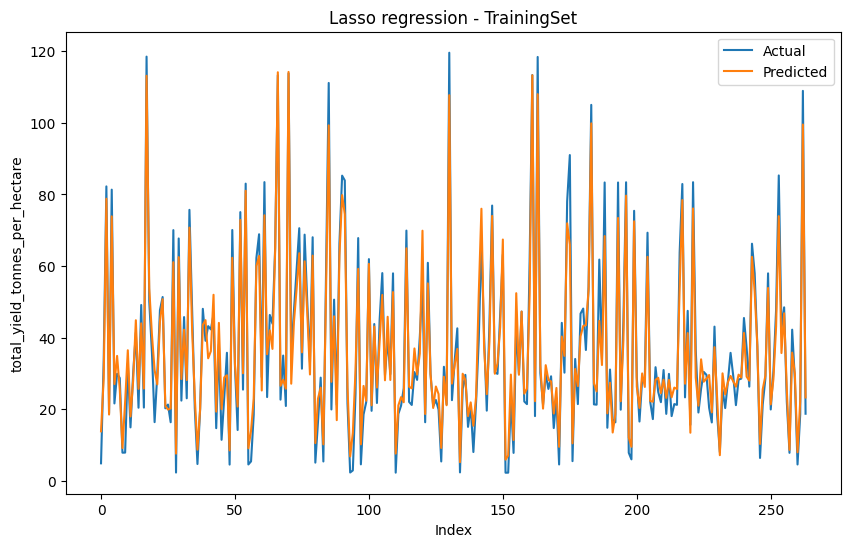

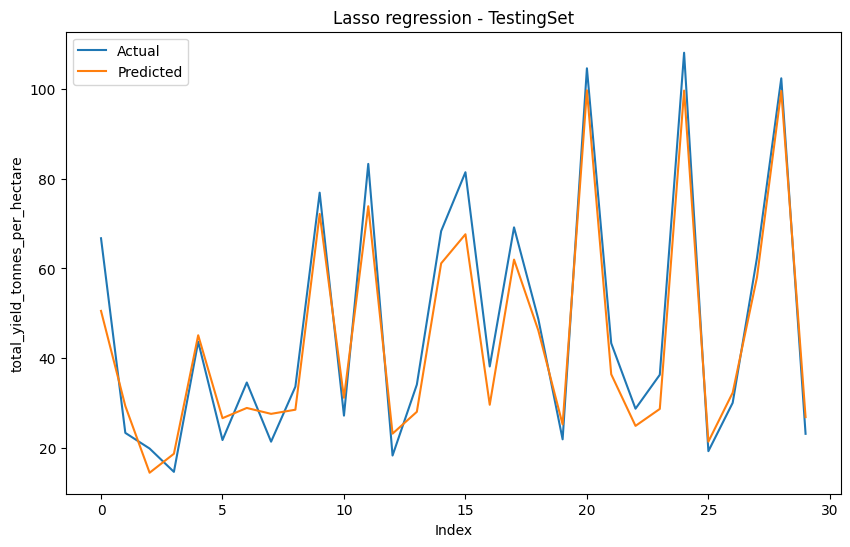

Lasso regression - Training RMSE: 5.60966716728486, Testing RMSE: 6.585293927980092
Lasso regression - Training MAE: 4.610110839016579, Testing RMSE: 5.778336867358452


In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_results = train_and_evaluate(lasso_model, X_train, X_test, y_train, y_test, "Lasso regression")
print(f"Lasso regression - Training RMSE: {lasso_results[0]}, Testing RMSE: {lasso_results[1]}")
print(f"Lasso regression - Training MAE: {lasso_results[2]}, Testing RMSE: {lasso_results[3]}")

## 4.2 SVM Regressor

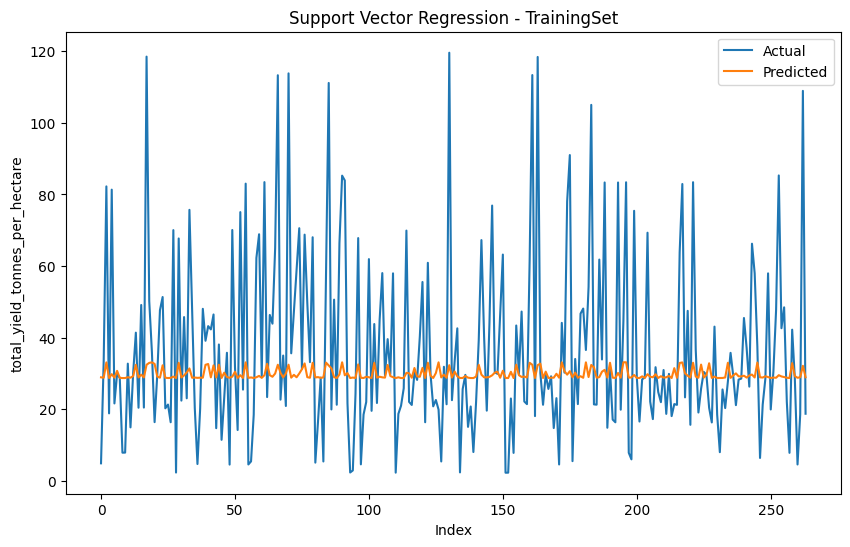

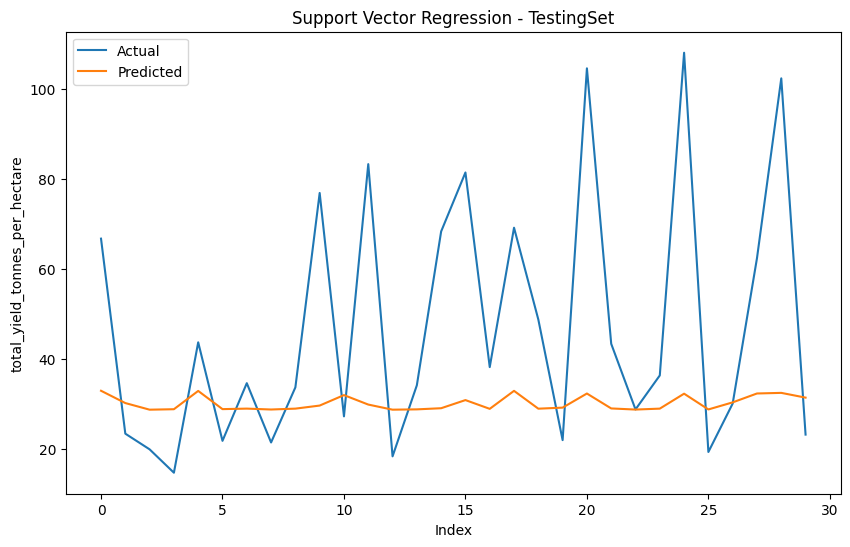

SVM regression - Training RMSE: 25.572452784171425, Testing RMSE: 31.654793156457785
SVM regressio - Training MAE: 18.008823722057556, Testing RMSE: 22.3293877617516


In [ ]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=0.1, epsilon=0.1)
svm_results = train_and_evaluate(svm_model, X_train, X_test, y_train, y_test, "Support Vector Regression")
print(f"SVM regression - Training RMSE: {svm_results[0]}, Testing RMSE: {svm_results[1]}")
print(f"SVM regressio - Training MAE: {svm_results[2]}, Testing RMSE: {svm_results[3]}")

## 4.3 Random Forest Regressor

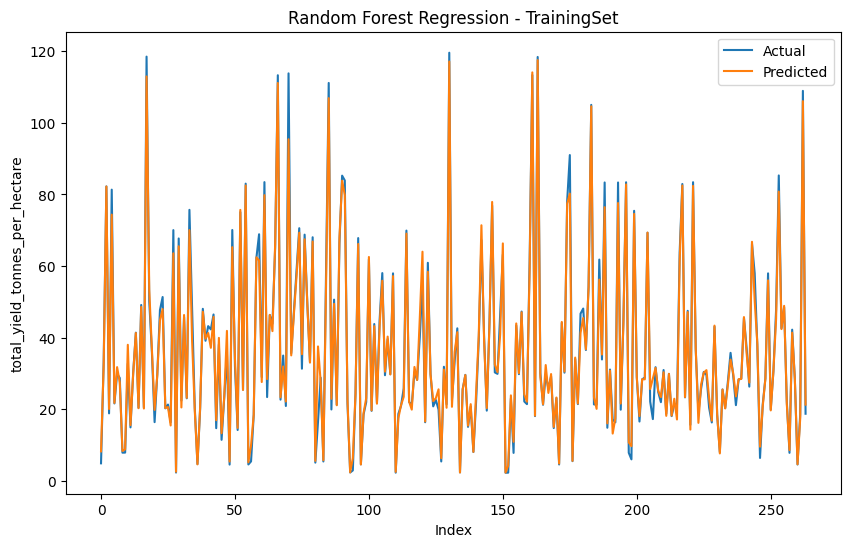

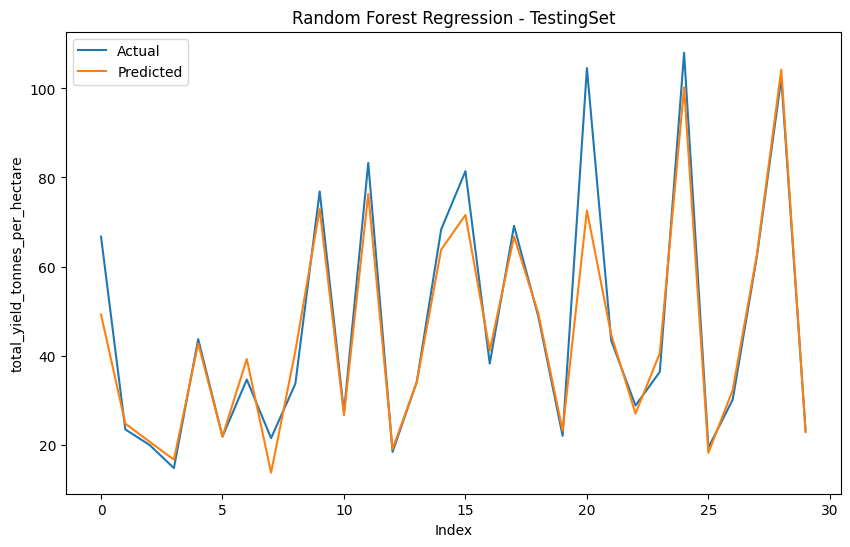

Random Forest Regression - Training RMSE: 3.0107228924748743, Testing RMSE: 7.661251028613279
Random Forest regressio - Training MAE: 1.7141909692574202, Testing RMSE: 4.301981108695653


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train and evaluate the Random Forest model
rf_results = train_and_evaluate(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regression")

# Print the results
print(f"Random Forest Regression - Training RMSE: {rf_results[0]}, Testing RMSE: {rf_results[1]}")
print(f"Random Forest regressio - Training MAE: {rf_results[2]}, Testing RMSE: {rf_results[3]}")

## 4.4 XGBoost Regressor

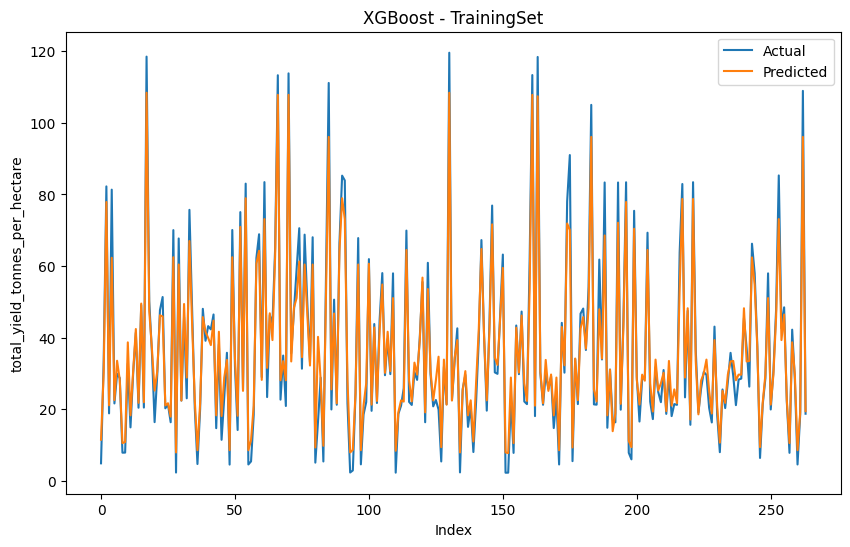

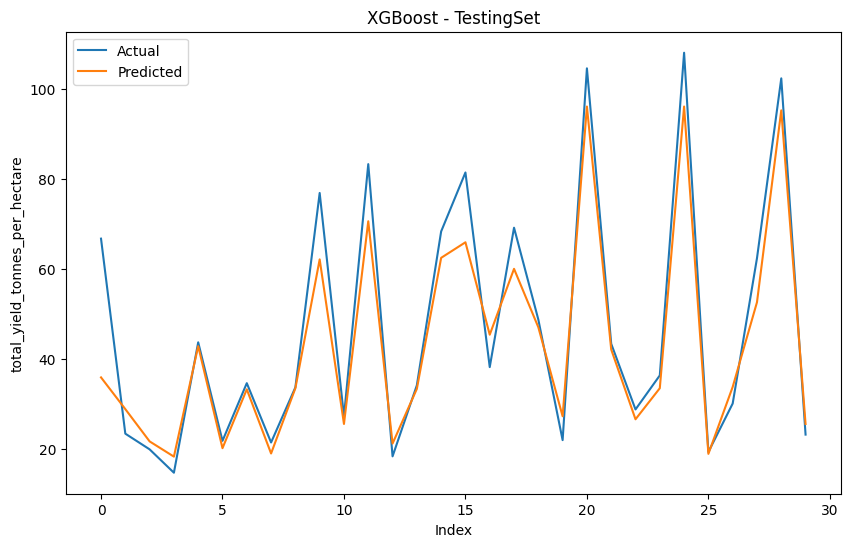

XGBoost - TrainingRMSE: 5.124815180366238, TestingRMSE: 8.626107606265863
XGBoost - Training MAE: 3.760176872769684, Testing RMSE: 5.8548690083725585


In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(n_estimators=50, learning_rate=0.05)
xgboost_results = train_and_evaluate(xgboost_model, X_train, X_test, y_train, y_test, "XGBoost")
print(f"XGBoost - TrainingRMSE: {xgboost_results[0]}, TestingRMSE: {xgboost_results[1]}")
print(f"XGBoost - Training MAE: {xgboost_results[2]}, Testing RMSE: {xgboost_results[3]}")

## 4.5 LightBGM Regressor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 264, number of used features: 15
[LightGBM] [Info] Start training from score 36.809742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

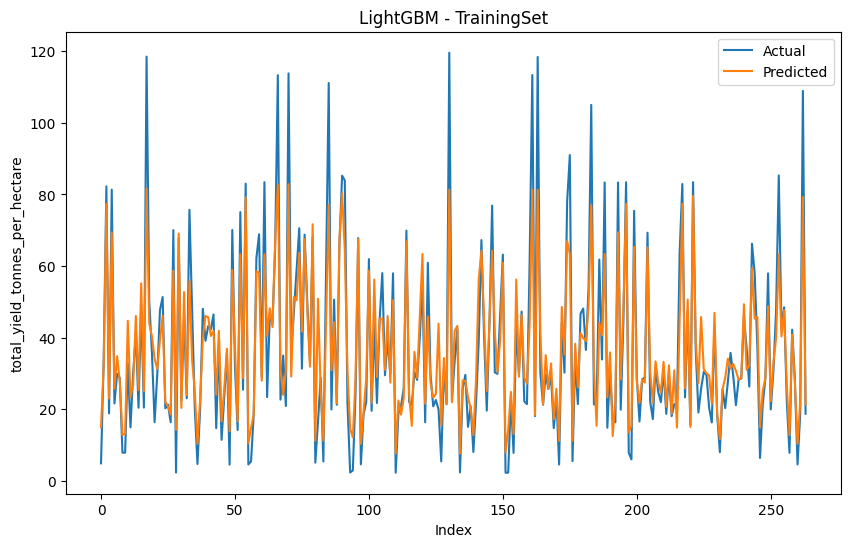

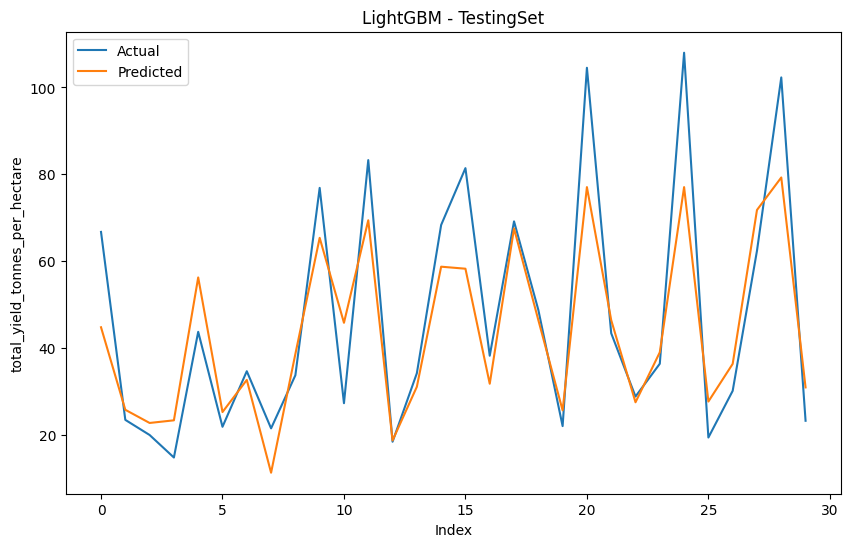

LightGBM - TrainingRMSE: 9.89269427730331, TestingRMSE: 12.595714430502644
LightGBM - Training MAE: 6.870553134828719, Testing RMSE: 9.43120476032312


In [ ]:
import lightgbm as lgb
lightgbm_model = lgb.LGBMRegressor(n_estimators=50, learning_rate=0.05)
lightgbm_results = train_and_evaluate(lightgbm_model, X_train, X_test, y_train, y_test, "LightGBM")
print(f"LightGBM - TrainingRMSE: {lightgbm_results[0]}, TestingRMSE: {lightgbm_results[1]}")
print(f"LightGBM - Training MAE: {lightgbm_results[2]}, Testing RMSE: {lightgbm_results[3]}")

# 5.0 Ensemble Modelling:


## 5.1 Lasso + RF

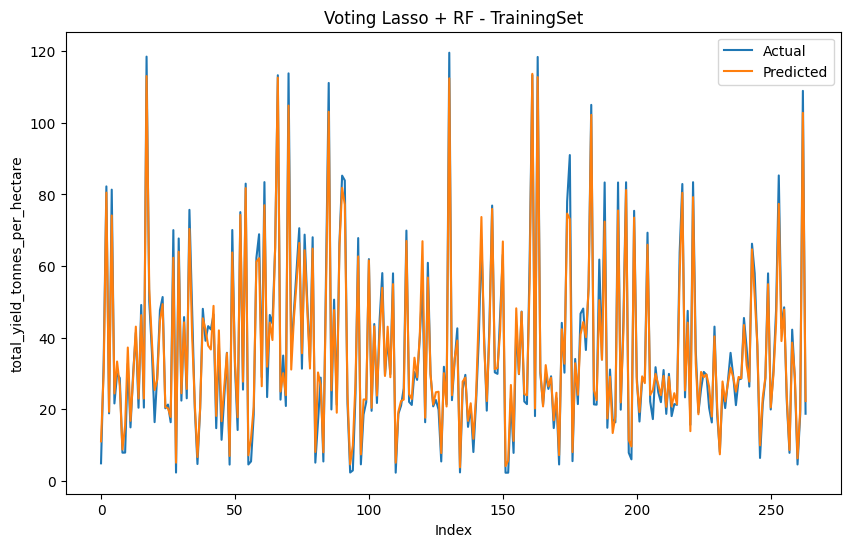

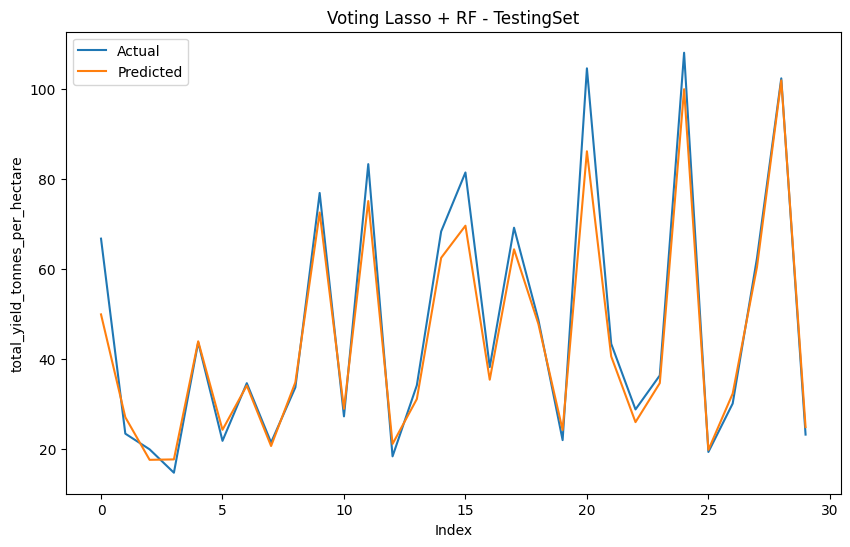

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_lasso_rf = VotingRegressor([('lasso', lasso_model), ('rf', rf_model)])
lasso_rf_results = train_and_evaluate(voting_lasso_rf, X_train, X_test, y_train, y_test, "Voting Lasso + RF")

## 5.2 SVM + RF

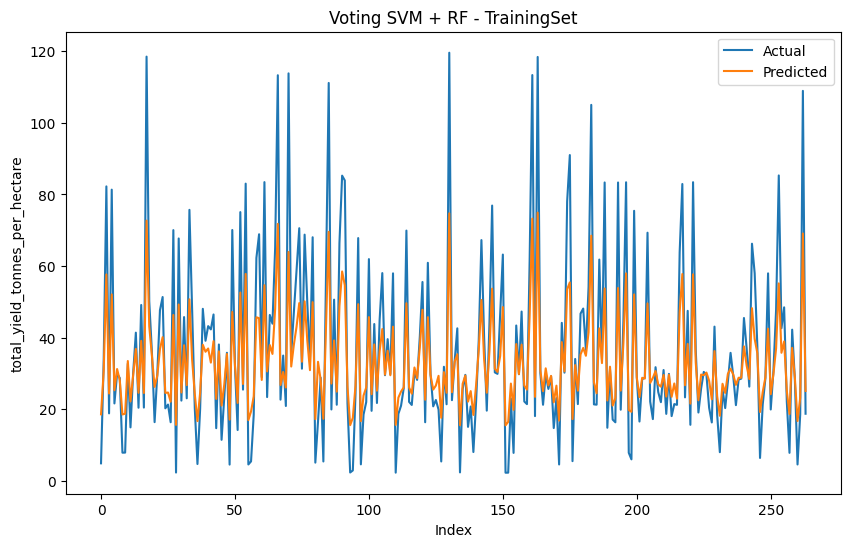

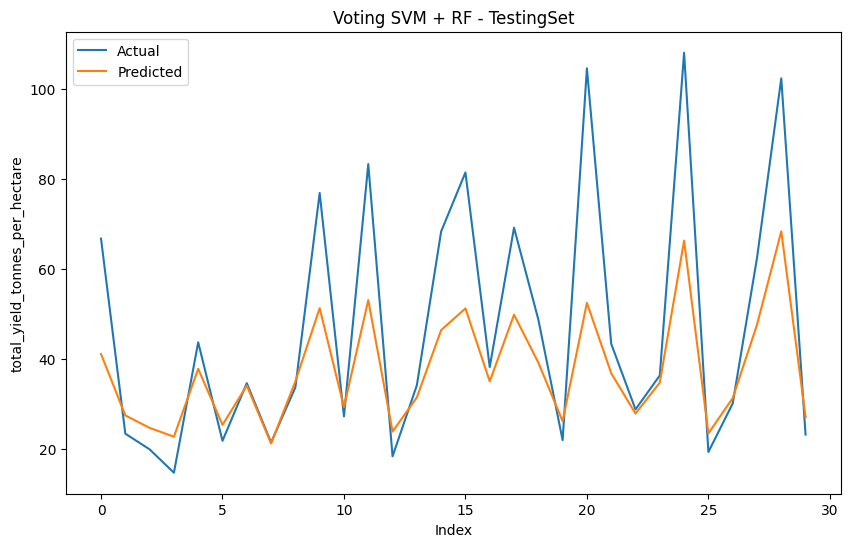

In [ ]:
voting_svm_rf = VotingRegressor([('svm', svm_model), ('rf', rf_model)])

svm_rf_results = train_and_evaluate(voting_svm_rf, X_train, X_test, y_train, y_test, "Voting SVM + RF")

## 5.3 XGBoost + RF

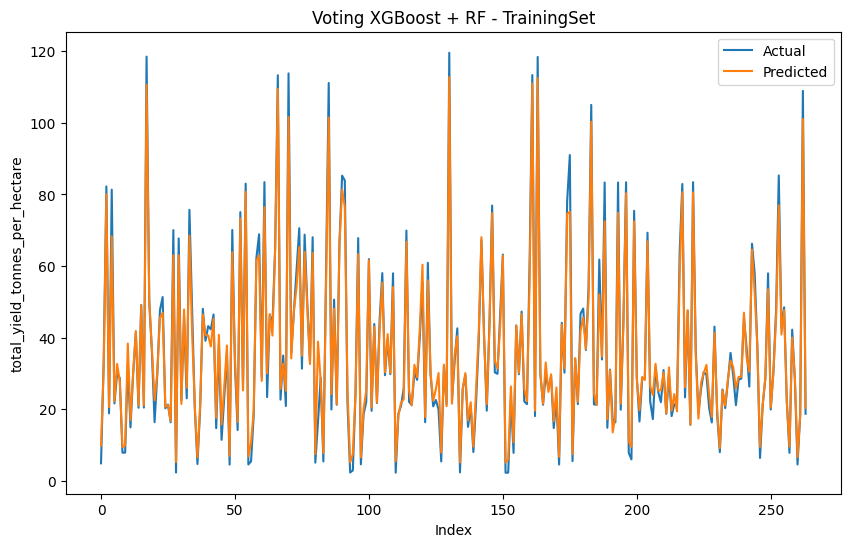

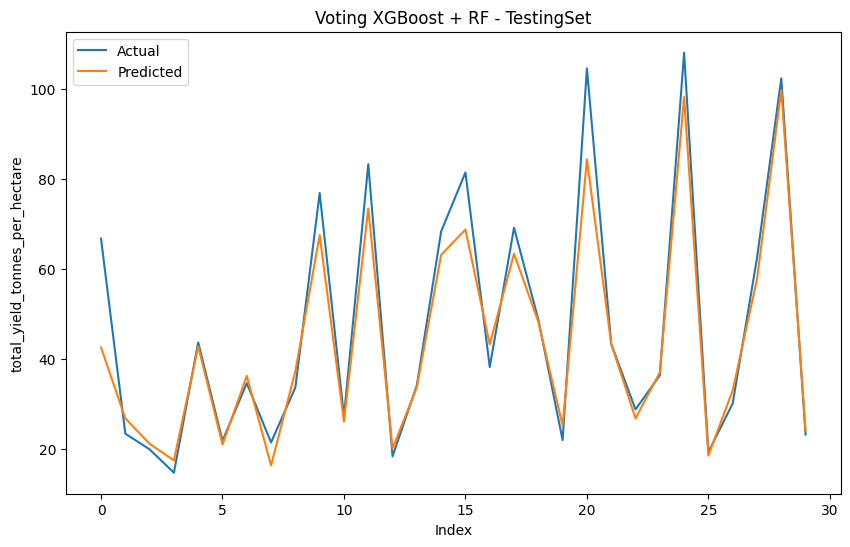

In [ ]:
voting_xgboost_rf = VotingRegressor([('xgboost', xgboost_model), ('rf', rf_model)])

xgboost_rf_results = train_and_evaluate(voting_xgboost_rf, X_train, X_test, y_train, y_test, "Voting XGBoost + RF")

## 5.4 LightGBM + RF

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 264, number of used features: 15
[LightGBM] [Info] Start training from score 36.809742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

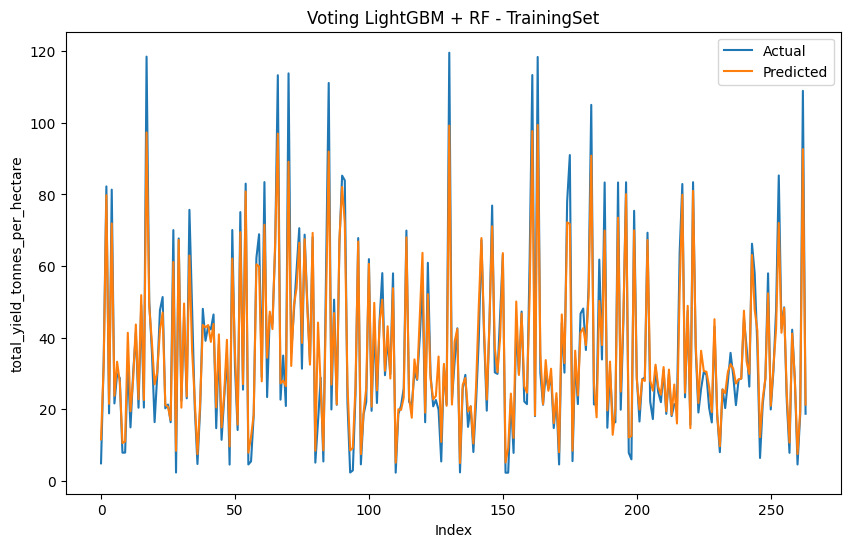

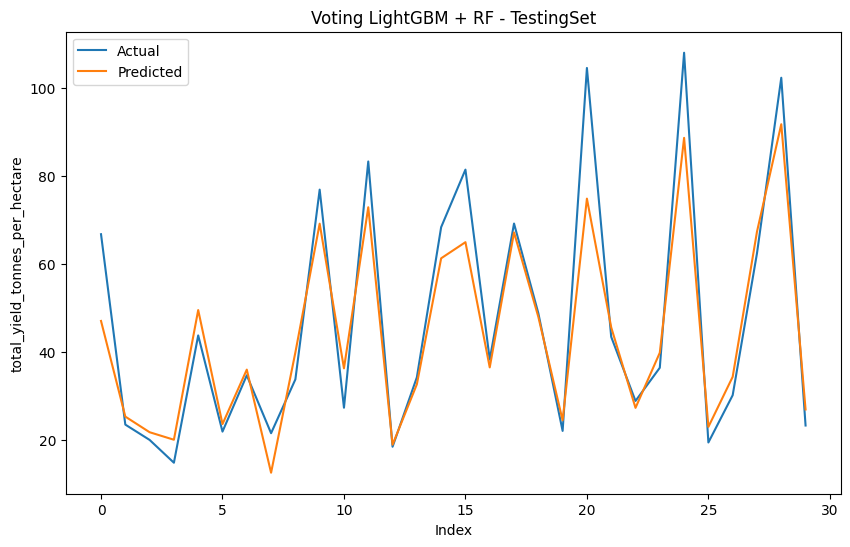

In [ ]:
voting_lightgbm_rf = VotingRegressor([('lightgbm', lightgbm_model), ('rf', rf_model)])

lightgbm_rf_results = train_and_evaluate(voting_lightgbm_rf, X_train, X_test, y_train, y_test, "Voting LightGBM + RF")

# 6.0 Results Tabulation

In [ ]:
results = [
    ("Lasso + RF", lasso_rf_results),
    ("SVM + RF", svm_rf_results),
    ("XGBoost + RF", xgboost_rf_results),
    ("LightGBM + RF", lightgbm_rf_results)
]

for name, res in results:
    print(f"{name} - TrainingRMSE: {res[0]}, TestingRMSE: {res[1]}")
    print(f"{name} - TrainingMAE: {res[0]}, TestingMAE: {res[1]}")

Lasso + RF - TrainingRMSE: 3.8382232261167184, TestingRMSE: 5.974314687521453
Lasso + RF - TrainingMAE: 3.8382232261167184, TestingMAE: 5.974314687521453
SVM + RF - TrainingRMSE: 13.542197302349159, TestingRMSE: 18.447045329027745
SVM + RF - TrainingMAE: 13.542197302349159, TestingMAE: 18.447045329027745
XGBoost + RF - TrainingRMSE: 3.7408776842101417, TestingRMSE: 7.397887393205775
XGBoost + RF - TrainingMAE: 3.7408776842101417, TestingMAE: 7.397887393205775
LightGBM + RF - TrainingRMSE: 6.04144145062945, TestingRMSE: 9.351900799702822
LightGBM + RF - TrainingMAE: 6.04144145062945, TestingMAE: 9.351900799702822


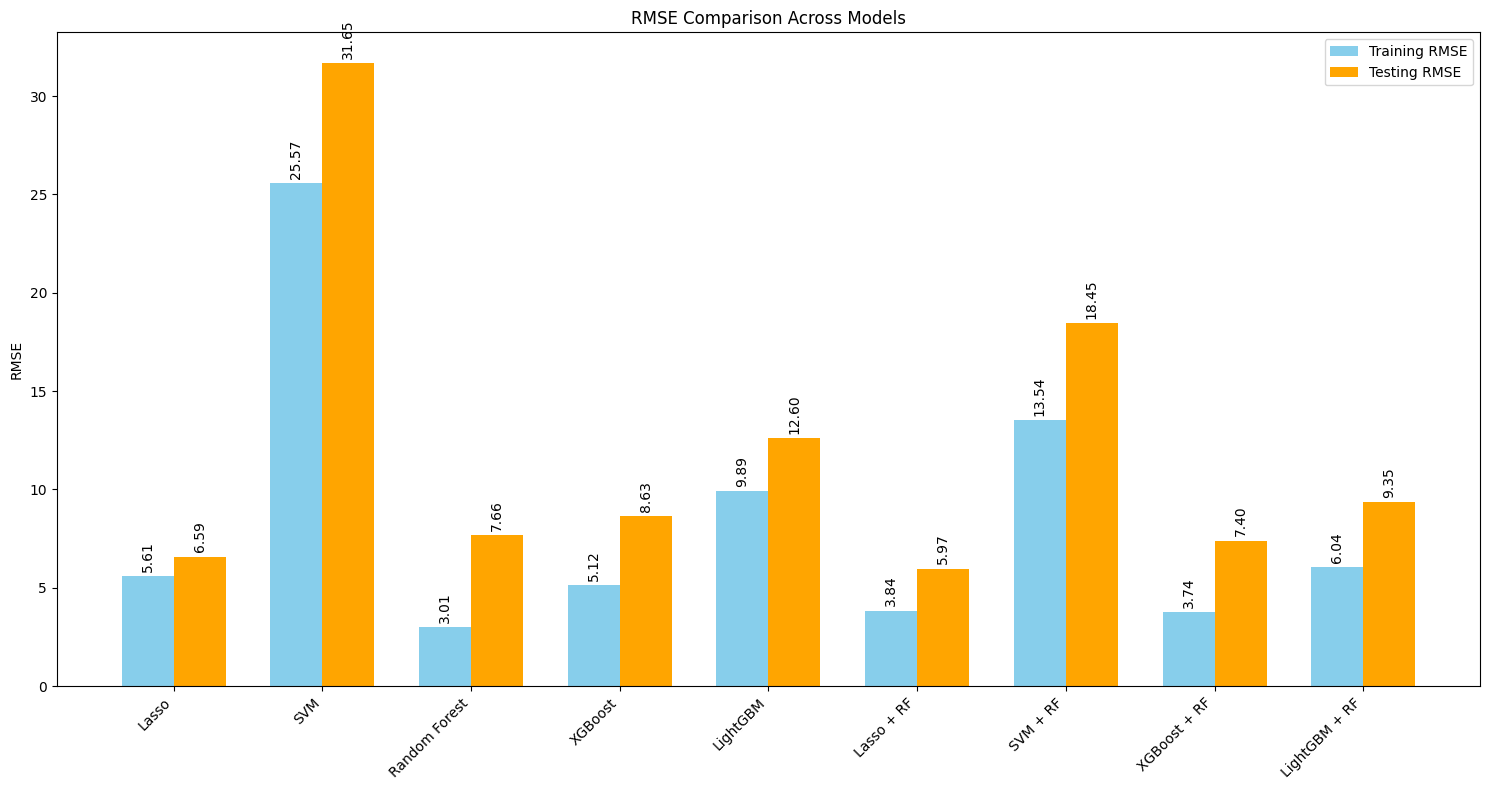

In [ ]:
models = {
    'Lasso': lasso_results,
    'SVM': svm_results,
    'Random Forest': rf_results,
    'XGBoost': xgboost_results,
    'LightGBM': lightgbm_results,
    'Lasso + RF': lasso_rf_results,
    'SVM + RF': svm_rf_results,
    'XGBoost + RF': xgboost_rf_results,
    'LightGBM + RF': lightgbm_rf_results
}

# Prepare data
model_names = list(models.keys())
train_rmse = [results[0] for results in models.values()]
test_rmse = [results[1] for results in models.values()]

# Set the position of the histogram
x = np.arange(len(model_names))
width = 0.35

# Create chart
fig, ax = plt.subplots(figsize=(15, 8))

# Draw a bar chart
rects1 = ax.bar(x - width/2, train_rmse, width, label='Training RMSE', color='skyblue')
rects2 = ax.bar(x + width/2, test_rmse, width, label='Testing RMSE', color='orange')

# Add some text elements
ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add numerical labels to columns
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

# Adjust layout and display charts
fig.tight_layout()
plt.show()

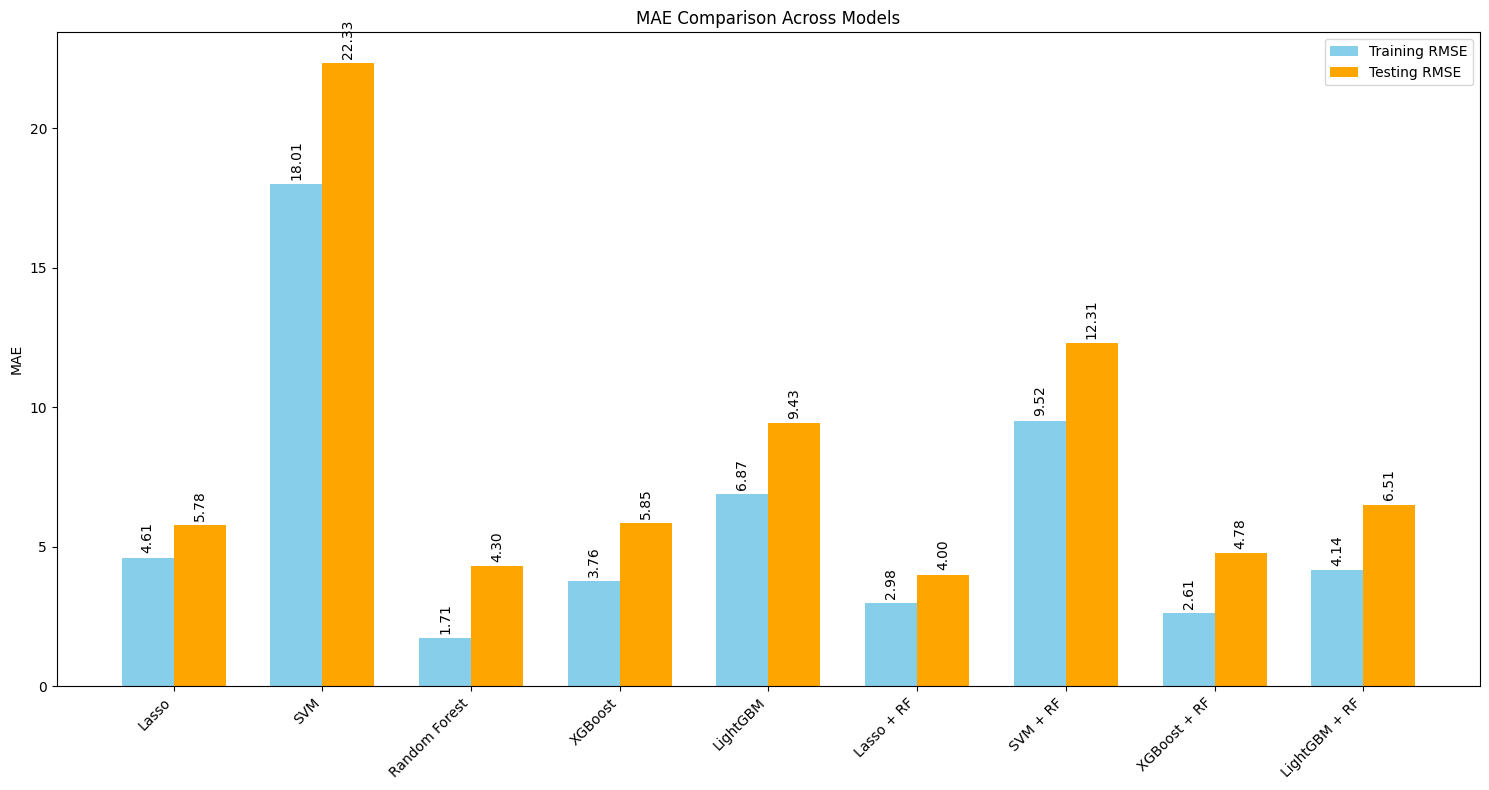

In [ ]:
# Prepare data
model_names = list(models.keys())
train_rmse = [results[2] for results in models.values()]
test_rmse = [results[3] for results in models.values()]

# Set the position of the histogram
x = np.arange(len(model_names))
width = 0.35

# Create chart
fig, ax = plt.subplots(figsize=(15, 8))

# Draw a bar chart
rects1 = ax.bar(x - width/2, train_rmse, width, label='Training RMSE', color='skyblue')
rects2 = ax.bar(x + width/2, test_rmse, width, label='Testing RMSE', color='orange')

# Add some text elements
ax.set_ylabel('MAE')
ax.set_title('MAE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add numerical labels to columns
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

# Adjust layout and display charts
fig.tight_layout()
plt.show()